## **1. 필기체 숫자 이미지 분류**

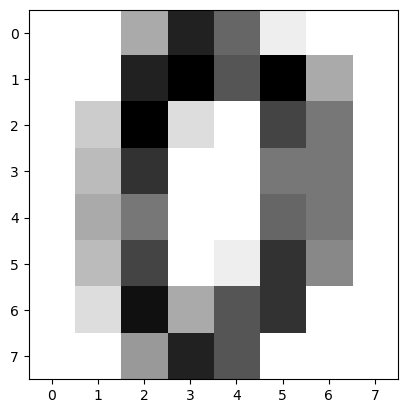

In [12]:
# 데이터 세트 불러오기
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [3]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [4]:
# 훈련 데이터와 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2)

In [5]:
# 모델
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

In [6]:
# 학습
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [7]:
# 예측
y_pred = knn.predict(X_test)

In [8]:
# 평가
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9916666666666667


[9]


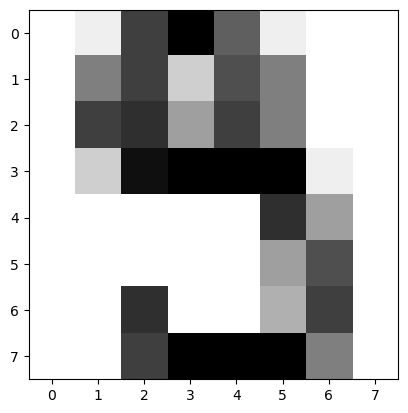

In [10]:
# 11번째 이미지 출력
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred = knn.predict([X_test[10]])
print(y_pred)
# 9로 예측

## 2. **MNIST 필기체 숫자 인식(심층 신경망)**

In [30]:
# 숫자 데이터 가져오기
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [32]:
# 모델 구축하기
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [33]:
# 학습시키기
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8940 - loss: 0.3584
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9686 - loss: 0.1007
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.9787 - loss: 0.0678
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9839 - loss: 0.0503
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9868 - loss: 0.0413
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9756 - loss: 0.0845


[0.07428081333637238, 0.9789000153541565]

## **3. 패션 아이템 분류**

In [39]:
# 완전 연결 신경망 이용
# 데이터 불러기기
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

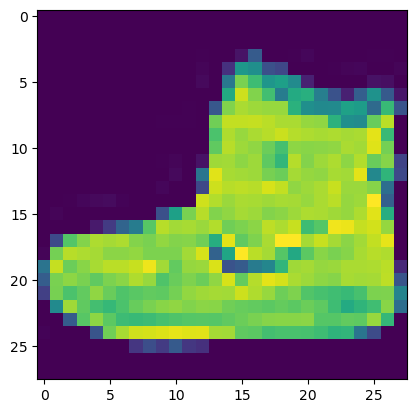

In [40]:
# 이미지 출력
plt.imshow(train_images[0])

In [41]:
# 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

In [42]:
# 모델
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [46]:
# 학습
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7792 - loss: 0.6310
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8620 - loss: 0.3852
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8771 - loss: 0.3393
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8845 - loss: 0.3151
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8916 - loss: 0.2982


In [48]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8722 - loss: 0.3510
정확도: 0.8740000128746033
